<a href="https://colab.research.google.com/github/rafaelnduarte/Twitter_Sentiment_Analysis/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)
# Twitter Sentiment Analysis

Sentiment Analysis is part of Natural Language Processing. It focuses on understanding the feelings behind our natural language.

<center><img alt="Recursos Humanos" width="60%" src="https://image.freepik.com/free-vector/people-with-funny-happy-emojis-illustration_53876-59076.jpg
"></center>

This kind of analysis is extremely useful nowadays, since we have overwhelming amounts of data coming out of social media, where people are constantly expressing their feelings towards other people, companies, situations, politics, and many other subjects.

> The goal of this project is to analyze the public opinion on President Trump amidst the Corovanavirus global pandemic.

The dataset was obtained by me using the [Tweepy](https://www.tweepy.org/) library, and the [Twitter API](https://developer.twitter.com/en/docs/basics/getting-started). The data was retrieved on April 20th 2020.

In [1]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

# hiding warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# setting the style
sns.set_style()

# displaying more information
pd.set_option('display.max_rows', 120)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# loading the dataset
df_search = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Twitter_Sentiment_Analysis/master/data/tweets_search.csv')
df_search.head()

,Tweet Content,Date,User,Source,Tweet ID,Tweet URL
0,#Pharmacies instituting anti-hoarding measures...,2020-04-19 23:59:59,HealthcareHwy,HubSpot,1252024177068048384,https://twitter.com/statuses/1252024177068048384
1,Dems play ‘blame game’ while republicans try t...,2020-04-19 23:59:52,wittroc63675401,Twitter for iPhone,1252024145841393666,https://twitter.com/statuses/1252024145841393666
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",2020-04-19 23:59:49,WeRListning,Twitter for Android,1252024132398649345,https://twitter.com/statuses/1252024132398649345
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",2020-04-19 23:59:48,bbridgesradio,Twitter Web App,1252024129034817538,https://twitter.com/statuses/1252024129034817538
4,#Trump says he’d be willing to give #coronavir...,2020-04-19 23:59:46,Newzjunkie_,Tweetbot for iΟS,1252024120268804102,https://twitter.com/statuses/1252024120268804102


Now that we've seen the data, we have a better idea of how it's distributed, and how what we can do with it.

Our first step is to analyze the statistical distribution of the data. Since we're talking about strings, let's use the `include=O` parameter when using the `describe` method on our data.

In [3]:
# distribution of the data
df_search.describe(include='O')

,Tweet Content,Date,User,Source,Tweet URL
count,1445,1445,1445,1445,1445
unique,1445,1172,1134,50,1445
top,Plagues Of USA & World Empires | History REPEA...,2020-04-19 23:00:00,MaceNewsMacro,Twitter for iPhone,https://twitter.com/statuses/1252010098102321153
freq,1,7,30,503,1


As expected, we could see that every tweet is unique. That's because we filtered out retweets when collecting the data.

Most of the collected tweets come from different users, but there are some repeated ones. The account that posted the most tweets in our dataset was `@MaceNewsMacro`.

Even though 50 different sources were used to post the tweets, over a third of them were posted using iPhones.


The next step is to select only the data we're interested in using. We're not interested in the source or url of the tweet right now. We're going to focus on the content of the tweet, the user who posted it and the date it was posted.

In [4]:
# changing the name of the column
df_search['Tweet'] = df_search['Tweet Content']

# selecting the data
df = df_search[['Tweet', 'User', 'Date']].copy()

# checking the results
df.head()

,Tweet,User,Date
0,#Pharmacies instituting anti-hoarding measures...,HealthcareHwy,2020-04-19 23:59:59
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48
4,#Trump says he’d be willing to give #coronavir...,Newzjunkie_,2020-04-19 23:59:46


In [5]:
# checking the shape of the dataframes
print("Seach Dataframe Shape")
print("Variables:\t", df.shape[1])
print("Entries:\t", df.shape[0])

Seach Dataframe Shape
Variables:	 3
Entries:	 1445


In [6]:
# checking info on the dataframes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1445 non-null   object
 1   User    1445 non-null   object
 2   Date    1445 non-null   object
dtypes: object(3)
memory usage: 34.0+ KB
None


## Data Cleaning

Everything looks great so far. However, we're talking about tweets, and there is a lot of noise around them. Data that would only confuse the library we're using. For that, we're going to remove some characters and elements from the content of the tweets, in order to get only the most important and relevant parts of them.

In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweet'] = df['Tweet'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Tweet,User,Date
0,Pharmacies instituting anti-hoarding measures ...,HealthcareHwy,2020-04-19 23:59:59
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48
4,Trump says he’d be willing to give coronavirus...,Newzjunkie_,2020-04-19 23:59:46


## Feature Engineering - Sentiment Analysis
I want to add the tweets’ subjectivity and polarity to the DataFrame. 

In order to do this, I’ll create two functions: 

* One to get the tweets called **Subjectivity** (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion).

* And the other to get the tweets called **Polarity** (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).

Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [8]:
# creating new variables 
df['Subjectivity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df['Polarity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# checking the results
df.head()

## NLP

Great! Now that we have our Polarity and Subjectivity scores it's time to go a little further on our analysis.

Here, we're going score the content of the tweets as being Positive, Neutral or Negative.

In [10]:
# importing necessary packages
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# preparing words for wordcloud
all_tweets = " ".join(d for d in df['Tweet'])

# stopwords
stopwords = set(STOPWORDS)
#stopwords.update("")

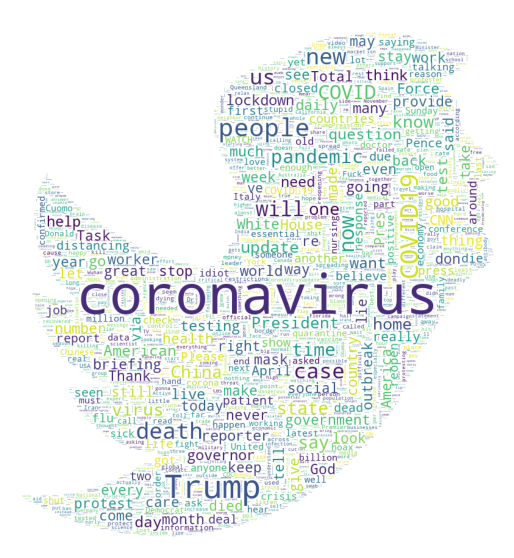

In [14]:
# creating a mask
trump_mask = np.array(Image.open("/content/trump_white.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white", collocations=False,
                    width=1000, height=1000, max_words=3000,
                    mask=trump_mask, max_font_size=200,
                    min_font_size=1).generate(all_tweets)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
#wordcloud.to_file('cart_wordcloud.png')

In the picture above we can see in this Trump shaped Twitter logo the most used words in Tweets that mentioned Donald Trump.

We ca see that most of them are related to the Coronavirus pandemic, but this is not enough to say whether they're negative or not. Let's go further.

Here, we'll use the `Polarity` feature to score the tweets based on their content.

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweet,User,Date,Subjectivity,Polarity,Analysis
0,Pharmacies instituting anti-hoarding measures ...,HealthcareHwy,2020-04-19 23:59:59,1.000000,0.000000,Neutral
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52,0.400000,-0.400000,Negative
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49,0.000000,0.000000,Neutral
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48,0.300000,0.000000,Neutral
4,Trump says he’d be willing to give coronavirus...,Newzjunkie_,2020-04-19 23:59:46,0.750000,0.250000,Positive
...,...,...,...,...,...,...
1440,Trump still playing politics now using as a c...,petes2cents,2020-04-19 22:56:49,0.750000,0.125000,Positive
1441,Rambling more than usual Coronavirus,AndyBailen,2020-04-19 22:56:47,0.375000,0.125000,Positive
1442,coronavirus covid19 Does Trump realise that be...,mmaryJ,2020-04-19 22:56:45,0.600000,-0.350000,Negative
1443,In Connecticut My 68 yr old cousin is in ICU w...,agenterob,2020-04-19 22:56:44,0.459375,-0.046875,Negative


Perfect! Now let's take a look at these tweets.

In [16]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) Trump says he’d be willing to give coronavirus aid to Iran   (via)

2)  is off the rails yet again.....can’t be honest at all. Defensive, combative, and a liar. coronavirus LiarInChief 

3) coronavirus deaths in Italy display huge, clustered quasi-geographical differences 

4) Join us Friday, April 24 at 1:30 p.m. for a virtual panel discussion on Coronavirus and how to StaySafeAtHome Hear the latest information about coronavirus (COVID-19) and what you need to know to protect yourself and your family. We’ll also provide... 

5) Yes, travel will go back to normal after coronavirus. Here's why —  

6) Don’t faint but I actually requested two non-fiction books from  for review!!! I’ve heard great things about both and would like to step out of my reading comfort zone at the moment. And I’m keen to reflect on their messaging. lessons coronavirus 

7) Trump knows good & gd well a q-tip won't work for coronavirus testing.
Cheap a--hole
He wants to still ALL of 

In [17]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) Dems play ‘blame game’ while republicans try to ‘problem solve’

coronavirus politics

2) If anyone wondered how Germans could have supported Hitler, look no further than the Trump cult members that will believe anything he says. If a Dem was POTUS, they’d be protesting that US hadn’t done enough shut down coronavirus covidUSA 

3) I know a lot of people are calling for the cable news channels to stop covering the daily Trump coronavirus PressBriefing. But maybe what we really need is for every network and cable channel to cover them so every American is forced to see how unhinged the president is.

4) At least we don’t have Monday blues anymore... every days the same 🤣🤣🤣coronavirus StayatHome

5) Even under urgent warnings of his CDC, Intel Agencies & Advisors this failed Impeached president missed almost 3 months to stop the Coronavirus allowing a fast spread and now cynically just wants to change facts and claim credit he doesn’t deserve and politicizes

According to the content of the tweets, our model seems to have done a great job! Let's plot a scatter plot and check the sentiment distribution of our data.

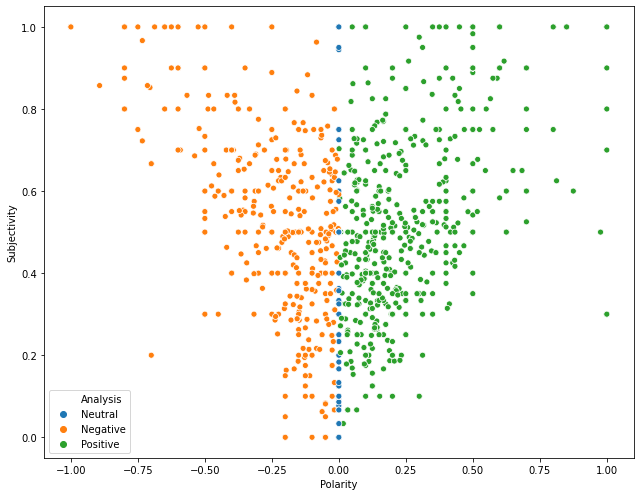

In [18]:
# plotting tweets by sentiment
plt.subplots(figsize=(9,7))

ax =sns.scatterplot(x="Polarity", y="Subjectivity", hue="Analysis", data=df);
plt.tight_layout()

In [19]:
#@title Preparing the Waffle Chart

!pip install pywaffle -q
from pywaffle import Waffle

     |████████████████████████████████| 532kB 2.8MB/s 


Another simple way of understanding the distribution of our data into the sentiment categories is by plotting a Waffle Chart.

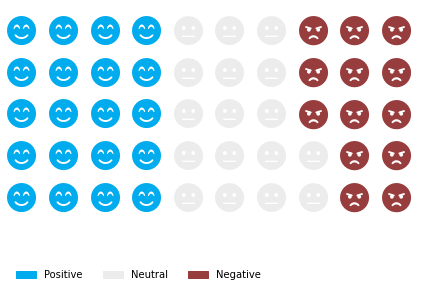

Tweets:
 Positive    564
Neutral     487
Negative    394
Name: Analysis, dtype: int64


Percentage for each sentiment:
 Positive    39.031142
Neutral     33.702422
Negative    27.266436
Name: Analysis, dtype: float64


In [20]:
#@title Sentiment Chart
# extracting value counts for the variable room_type
data = df.Analysis.value_counts().to_dict()

# plotting a waffle chart
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=10,
                colors=("#00acee", "#ececec", "#983D3D"),
                values=data, icons=('smile-beam','meh', 'angry'), icon_size=30,
                legend={'loc': 'lower left', 'bbox_to_anchor':  (0, -0.4), 'framealpha': 0,
                        'ncol': len(data)},
                icon_legend=False, 
                )
fig.set_tight_layout(True)
plt.show();

# show the quantity of each type of listing available
print('Tweets:\n',df.Analysis.value_counts())
print('\n')
# show the percentage of each type of listing available
print('Percentage for each sentiment:\n',df.Analysis.value_counts() / df.shape[0] * 100)


# Conclusions
All of this should be taken with a grain of salt. After all, we're analyzing a very small sample of fewer than 2000 tweets on the subject, over a very short period. By comparison, you should know that about 6.000 tweets are sent out every second around the world.

## Next Steps
Now that we've come around with a very solid step-by-step solution to Twitter Sentiment Analysis, the next step would be to try it with a larger sample, or maybe a stream of tweets, and have an hourly report on the subject being analyzed. The possibilities are uncountable, and the power of this analysis inestimable. Stay tuned for more.

# Thank You!

I hope to have provided interesting insights, and a valuable project. Should you have any comments, questions or suggestions, don't hesitate to contact me on [LinkedIn](https://www.linkedin.com/in/rafael-n-duarte/), and check out my other projects on [GitHub](https://github.com/rafaelnduarte).

<center><img width = '80%'src= "https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>